In [1]:
import os
from IPython.display import display

# ROOT contais the project directory 
os.chdir(os.path.dirname(os.getcwd()))

In [2]:
from src.plots import plot_color_bar
from src.Fundus import Fundus
from src.nearest_neighbor_mean import nearest_neighbour_mean as nnm
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from tqdm import tqdm
import torch

import PIL
from PIL import Image

46675


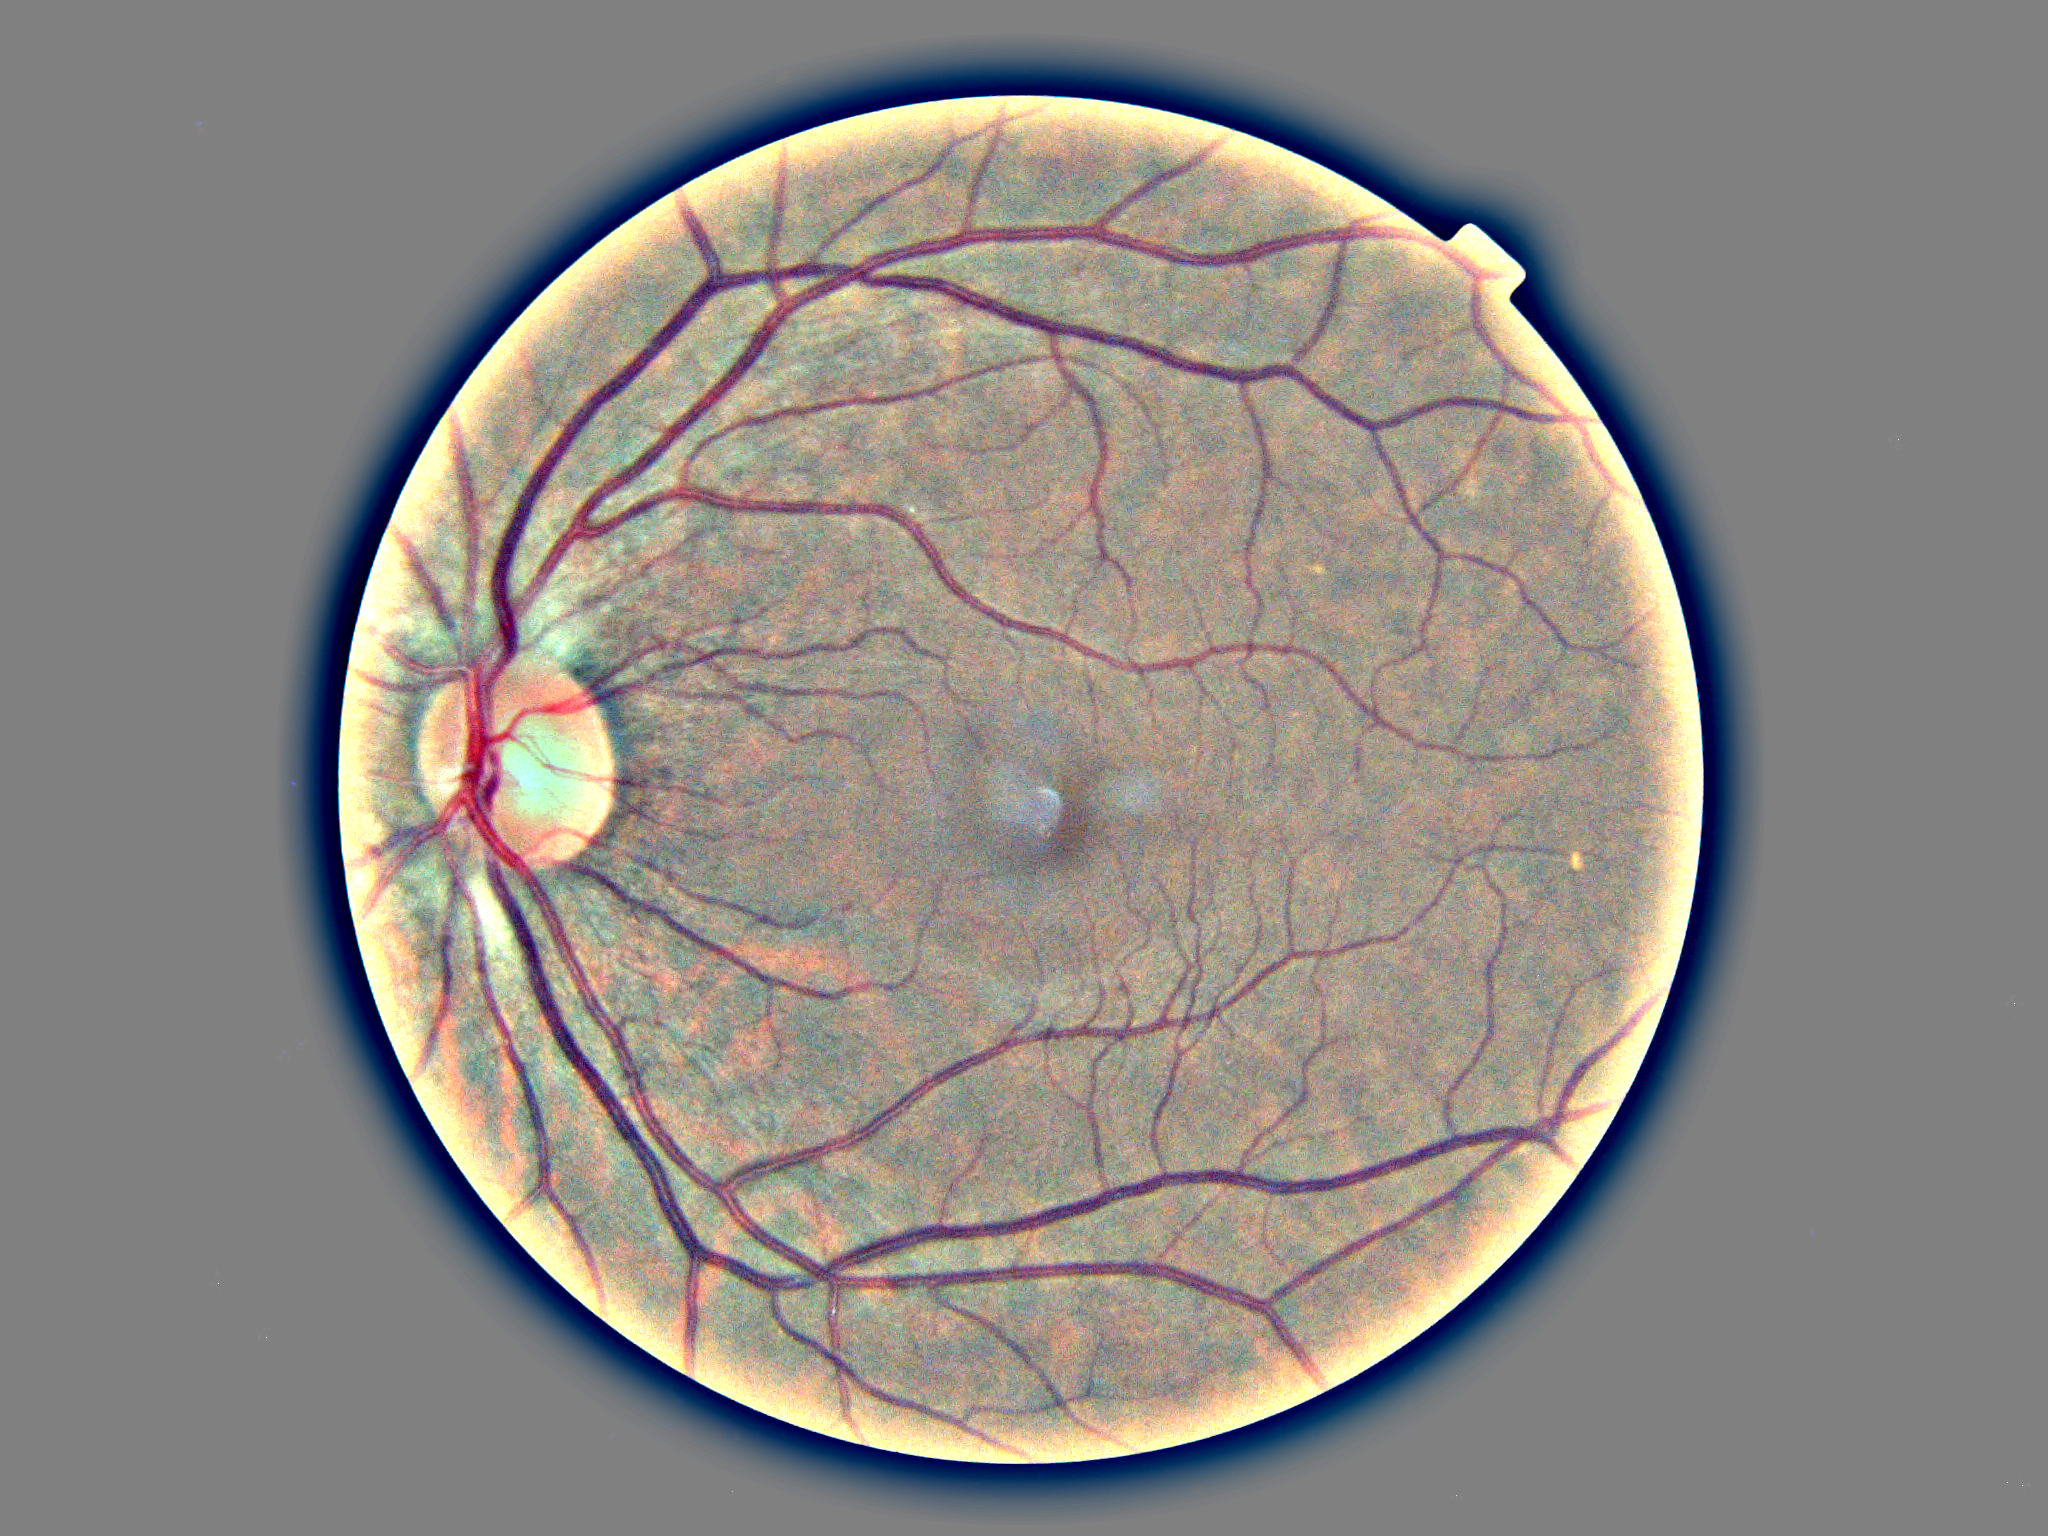

In [3]:
original = Fundus("data/noma/female_rank_0.png")
print(len(original.palette))
original.im

/opt/conda/conda-bld/pytorch_1591914855613/work/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.
100%|██████████| 2048/2048 [01:00<00:00, 33.79it/s]


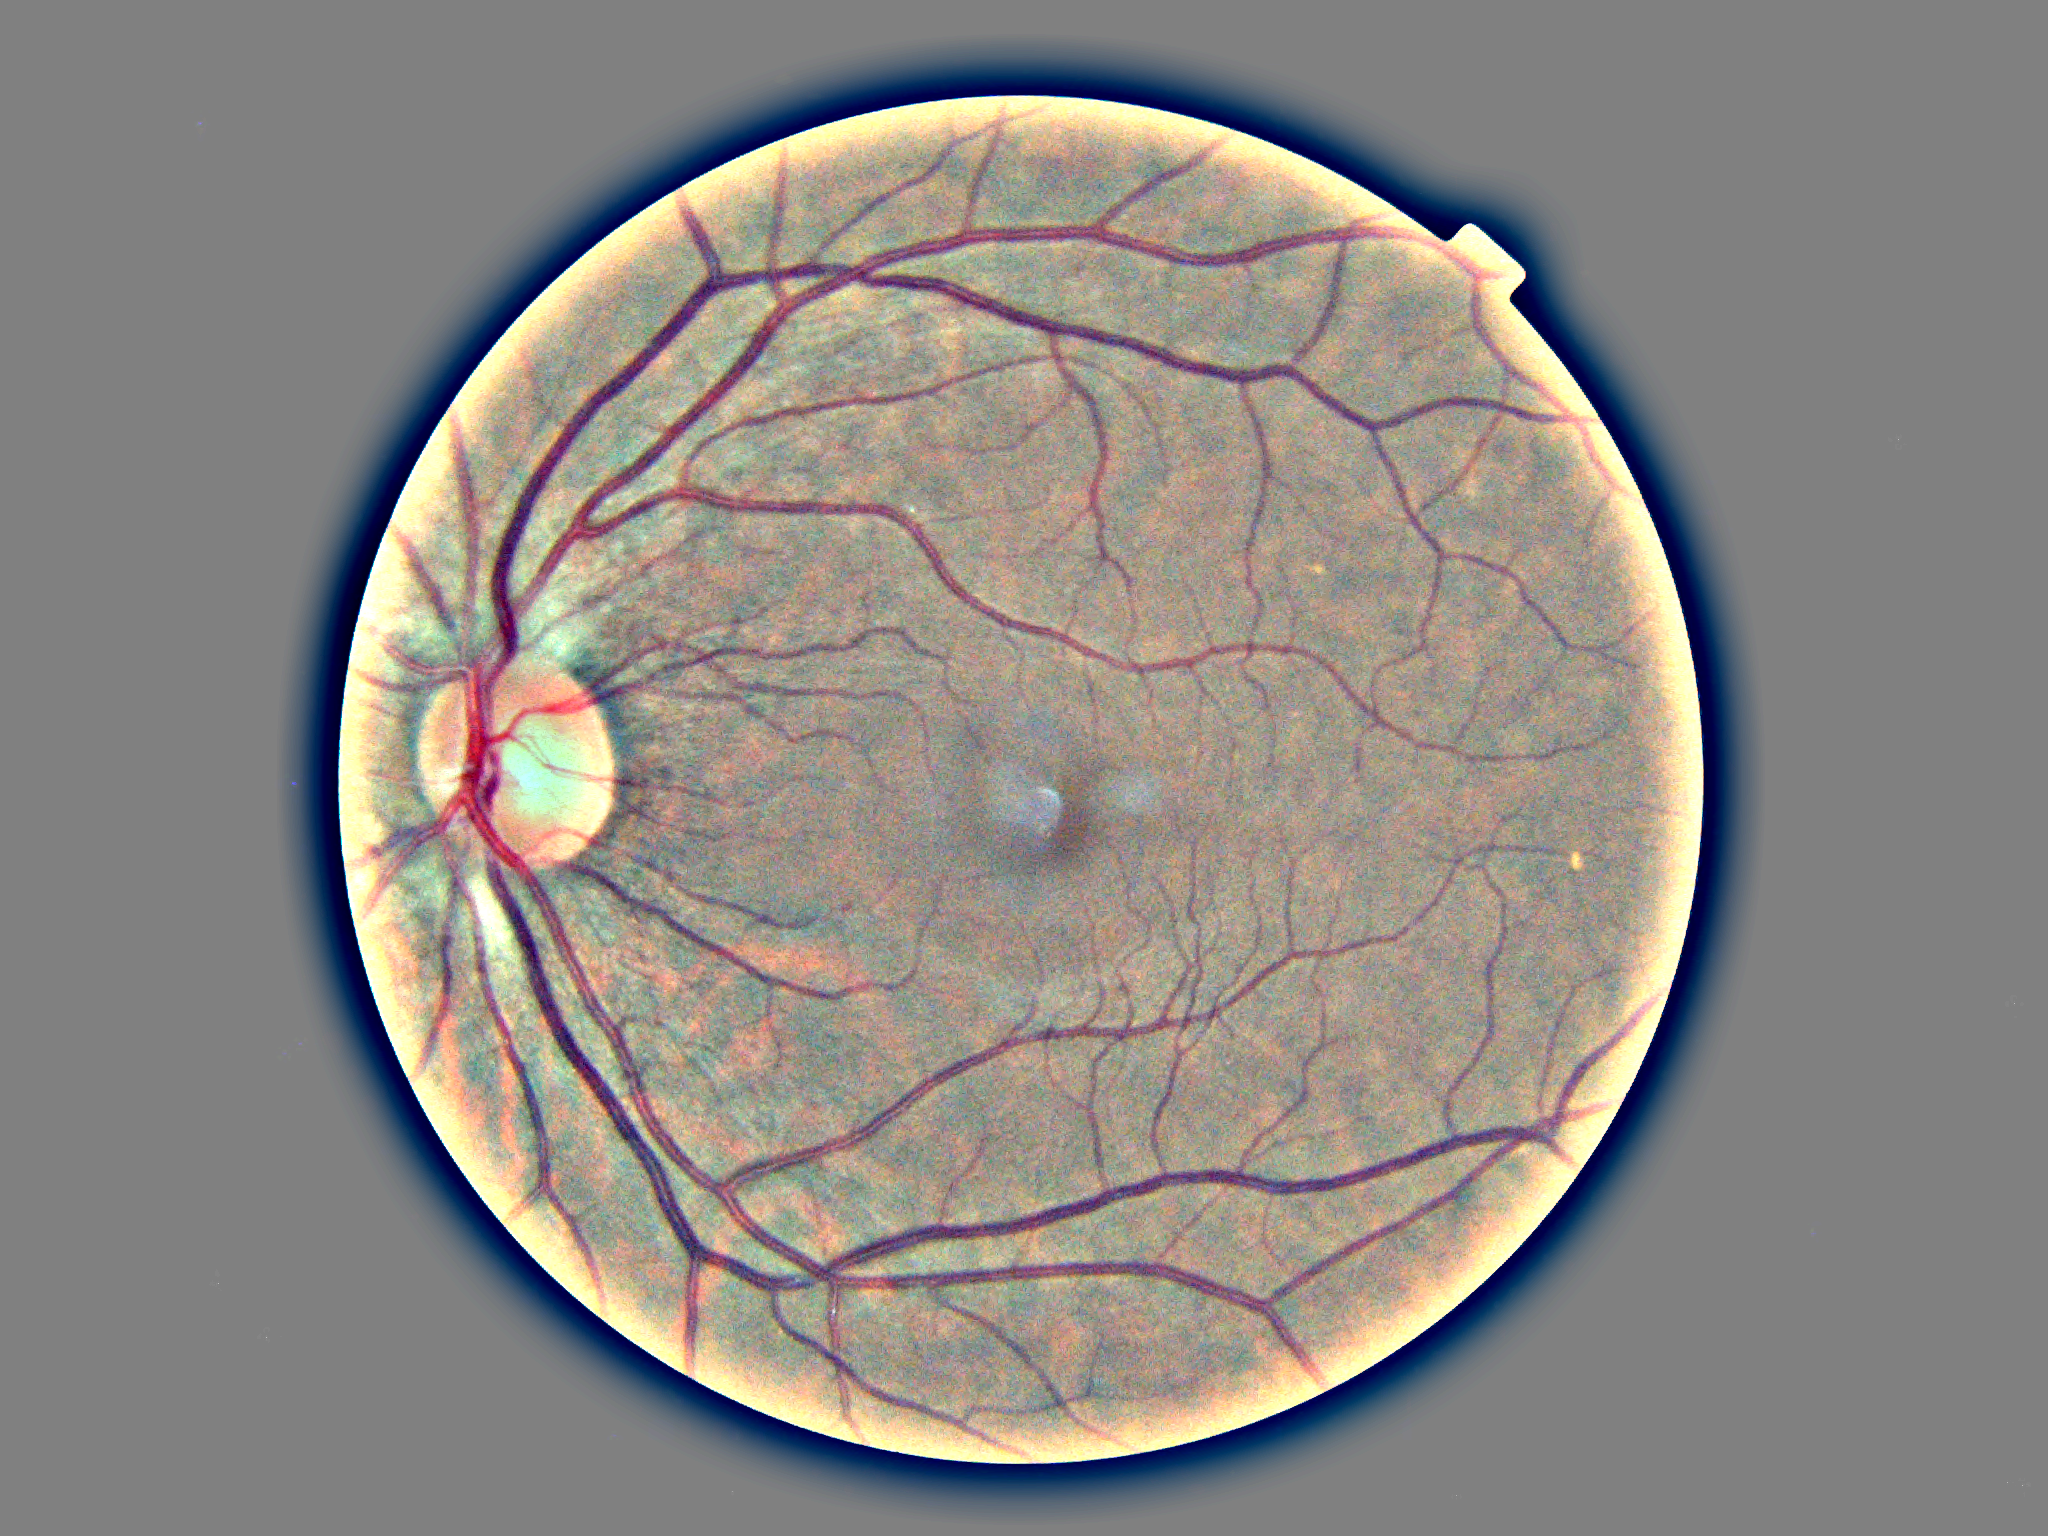

In [4]:
orig_nnm1 = nnm(np.asarray(original.im))
orig_nnm1

In [ ]:
orig_nnm2 = nnm(np.asarray(orig_nnm1))
orig_nnm2

In [ ]:
orig_nnm3 = nnm(np.asarray(orig_nnm2))
orig_nnm3

In [ ]:
orig_nnm4 = nnm(np.asarray(orig_nnm3))
orig_nnm4

In [ ]:
orig_nnm5 = nnm(np.asarray(orig_nnm4))
orig_nnm5

In [ ]:
orig_nnm6 = nnm(np.asarray(orig_nnm5))
orig_nnm6

In [ ]:
orig_nnm7 = nnm(np.asarray(orig_nnm6))
orig_nnm7

In [ ]:
Fundus(orig_nnm1).palette.shape

In [ ]:
Fundus(orig_nnm5).palette.shape

In [ ]:
Fundus(orig_nnm6).palette.shape

In [ ]:
Fundus(orig_nnm7).palette.shape

In [ ]:
# Cluster pixels
modified = original.cluster_pixels_torch(40)
print(len(modified.palette))

In [ ]:
# Sort palette by G value and plotting the palette for the modified image
toplot = modified.palette[np.argsort(modified.palette[:,1])]
plot_color_bar(toplot)

# Split palette between the colors that are more greenish and those that are more red-blueish
n = 20
remove = toplot[n:,:]
keep = toplot[:n,:]

plot_color_bar(remove)
plot_color_bar(keep)

# Now let's sort the palette by blue values
#print(np.argsort(np.diff(keep[:,0::2]).flatten()))
#print(keep[:,0]/keep[:,1])
#diff_rg = np.diff().flatten()
#keep_blue = keep[np.argsort(np.diff(keep)[:,0])]
#print(keep_blue)
#plot_color_bar(keep_blue)
#plot_color_bar(toremove)
#plot_color_bar(tokeep[np.argsort(np.diff(tokeep[:,1:3]).flatten())])
#plot_color_bar(tokeep[np.argsort(tokeep[:,0])])

In [ ]:
modified.im

In [ ]:
modified2 =  Fundus(modified.mask_torch(colors = remove, replacement=np.array([[128,128,128]])), w=original.w, h=original.h)
modified2.im

In [ ]:
#modified2.palette[np.argsort(modified2.palette, axis=1)]
toremove = modified2.palette[np.argsort(modified2.palette[:,1])]
plot_color_bar(toremove)

In [ ]:
modified3=  Fundus(modified2.mask_torch(colors = toremove[-6:], replacement=np.array([[128,128,128]])), w=original.w, h=original.h)
modified3.im

In [ ]:
plot_color_bar(modified2.palette[np.argsort(modified2.palette[:,1])])

In [ ]:
veinsubset =  Fundus(modified2.im.crop((550, 550, 600, 600)))
print(len(veinsubset.palette))
veinsubset.im

In [ ]:
tohighlight=veinsubset.palette[np.argsort(veinsubset.palette[:,1])][:50]

plot_color_bar(tohighlight)

In [ ]:
a = veinsubset.mask_torch(colors = tohighlight, replacement=np.array([[0,255,0]]))
fun = Fundus(a, w=veinsubset.w, h=veinsubset.h)

In [ ]:
fun.im

In [ ]:
modified3 = Fundus(modified2.mask_torch(colors = tohighlight, replacement=np.array([[0,0,255]])), w=original.w, h=original.h)
modified4 = Fundus(modified3.mask_torch(colors = np.array([[116, 124, 132]]), replacement=np.array([[255,255,255]])), w=original.w, h=original.h)

In [ ]:
modified4.im.save("lol.png")